In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [2]:
dataset_train = pd.read_csv("trainset.csv")

In [3]:
dataset_train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
5,2013-01-09,363.769043,366.789398,361.945892,366.675140,366.675140,4075700
6,2013-01-10,369.014923,370.092896,364.380066,368.344269,368.344269,3695100
7,2013-01-11,368.602600,368.816193,365.771027,367.604095,367.604095,2587000
8,2013-01-14,366.118744,368.701935,358.841095,359.288177,359.288177,5765000
9,2013-01-15,357.340851,365.125214,353.749207,360.122742,360.122742,7906300


In [4]:
trainset = dataset_train.iloc[:,1:2].values

In [5]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [6]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [7]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [8]:
x_train = []
y_train = []

In [9]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])


In [10]:
x_train = np.array(x_train)
y_train=np.array(y_train)

In [11]:
x_train.shape

(1199, 60)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [14]:
model.add(Dropout(0.2))


In [15]:
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))


In [16]:
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

In [17]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [18]:
model.add(Dense(units = 1))

In [19]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [20]:
model.fit(x_train,y_train,epochs = 30, batch_size = 32)

Epoch 1/30
38/38 [==============================] - 13s 71ms/step - loss: 0.0374
Epoch 2/30
38/38 [==============================] - 3s 71ms/step - loss: 0.0043
Epoch 3/30
38/38 [==============================] - 3s 71ms/step - loss: 0.0043
Epoch 4/30
38/38 [==============================] - 3s 71ms/step - loss: 0.0042
Epoch 5/30
38/38 [==============================] - 3s 72ms/step - loss: 0.0041
Epoch 6/30
38/38 [==============================] - 3s 73ms/step - loss: 0.0035
Epoch 7/30
38/38 [==============================] - 3s 72ms/step - loss: 0.0032
Epoch 8/30
38/38 [==============================] - 3s 71ms/step - loss: 0.0034
Epoch 9/30
38/38 [==============================] - 3s 71ms/step - loss: 0.0040
Epoch 10/30
38/38 [==============================] - 3s 73ms/step - loss: 0.0035
Epoch 11/30
38/38 [==============================] - 3s 72ms/step - loss: 0.0031
Epoch 12/30
38/38 [==============================] - 3s 74ms/step - loss: 0.0033
Epoch 13/30
38/38 [=================

In [21]:
dataset_test =pd.read_csv("testset.csv")

In [22]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [23]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [24]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [25]:
inputs = inputs.reshape(-1,1)

In [26]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [27]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [28]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [29]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [31]:
predicted_price = model.predict(x_test)

4/4 [==============================] - 2s 26ms/step


In [32]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1041.8785 ],
       [1043.2611 ],
       [1044.0232 ],
       [1044.564  ],
       [1045.289  ],
       [1046.539  ],
       [1048.5452 ],
       [1051.269  ],
       [1054.6058 ],
       [1058.3492 ],
       [1062.4996 ],
       [1066.9861 ],
       [1071.7257 ],
       [1076.5967 ],
       [1081.495  ],
       [1086.4803 ],
       [1091.7177 ],
       [1097.2477 ],
       [1103.021  ],
       [1108.9164 ],
       [1114.6971 ],
       [1120.1488 ],
       [1125.0369 ],
       [1128.8824 ],
       [1131.1077 ],
       [1130.9056 ],
       [1128.2588 ],
       [1123.3213 ],
       [1116.1934 ],
       [1107.3889 ],
       [1097.533  ],
       [1087.2987 ],
       [1077.5242 ],
       [1068.9729 ],
       [1062.1824 ],
       [1057.5308 ],
       [1055.1987 ],
       [1055.0773 ],
       [1056.9637 ],
       [1060.6176 ],
       [1065.5443 ],
       [1071.0734 ],
       [1076.1605 ],
       [1080.1497 ],
       [1082.8939 ],
       [1084.4158 ],
       [1085.0718 ],
       [1085.

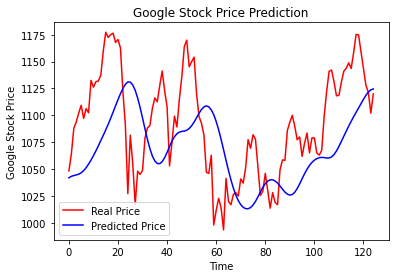

In [33]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()